# U2T3

## Merge networks

In [32]:
# Libs
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import networkx as nx
import os

In [27]:
# Listagem de Arquivos GraphML no Diretório 'assets'

# Utiliza a biblioteca os para listar arquivos no diretório 'assets'.
# A função os.listdir('assets') retorna uma lista de nomes de arquivos no diretório especificado.
# A compreensão de lista ([file for file in ...]) filtra os arquivos para incluir apenas aqueles que terminam com a extensão 'graphml'.
files = [file for file in os.listdir('assets') if file.endswith('graphml')]

# Leitura de Grafos a partir dos Arquivos GraphML

# Utiliza a biblioteca NetworkX (nx) para criar uma lista de grafos lidos a partir dos arquivos 'graphml' no diretório 'assets'.
# A compreensão de lista ([nx.read_graphml(f'assets/{file}') for file in files]) percorre a lista de nomes de arquivos e lê cada grafo GraphML.
# Cada grafo é armazenado como um objeto de grafo e a lista resultante é atribuída à variável 'networks'.
networks = [nx.read_graphml(f'assets/{file}') for file in files]

In [28]:
# Utiliza a biblioteca NetworkX (nx) para compor (combinar) todos os grafos presentes na lista 'networks' em um único grafo.
# A função nx.compose_all(networks) recebe uma lista de grafos e retorna o grafo resultante da composição.
# O grafo resultante, que contém todos os nós e arestas dos grafos originais, é atribuído à variável 'g'.
g = nx.compose_all(networks)

In [29]:
len(g.edges), len(g.nodes)

(106942, 15090)

In [30]:
indegree = sorted(dict(g.in_degree).values(),reverse=True)

## Centralities

In [67]:
# Função para Criar Colorbar de Centralidade em uma Imagem

# Importa a biblioteca Image do módulo PIL para manipulação de imagens.
from PIL import Image

# Função que recebe um grafo 'n', um título 'title' e o caminho da imagem 'path', e cria um colorbar de centralidade sobreposta à imagem.
def get_centrality_colorbar(n, title, path):
    # Converte a imagem para um array NumPy para manipulação.
    img = np.asarray(Image.open(path))

    # Obtém os valores de centralidade dos nós do grafo 'n'.
    nodes = list(dict(n).values())

    # Define um mapa de cores (cmap) e normalização (norm) com base nos valores de centralidade.
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=min(nodes), vmax=max(nodes))

    # Oculta as marcações (ticks) nos eixos.
    plt.xticks([])
    plt.yticks([])

    # Plota a imagem.
    plt.imshow(img)

    # Adiciona um colorbar à direita da imagem usando um objeto ScalarMappable.
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=title)


C:\Users\rapha\AppData\Local\Temp\ipykernel_8024\618288388.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=title)


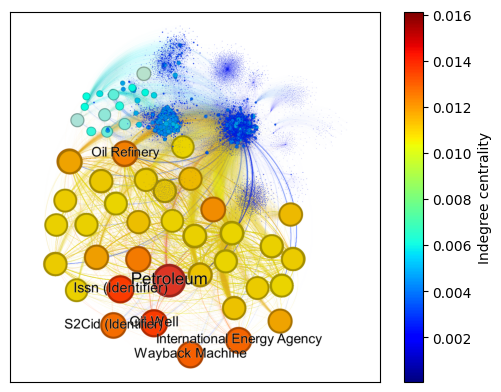

In [85]:
get_centrality_colorbar(nx.in_degree_centrality(g), 'Indegree centrality', './assets/imgs/indegree-centrality.png')

C:\Users\rapha\AppData\Local\Temp\ipykernel_8024\618288388.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=title)


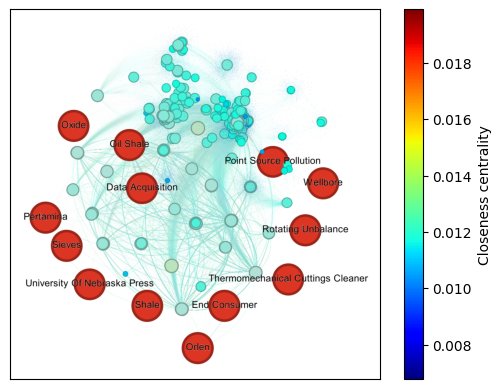

In [68]:
get_centrality_colorbar(nx.closeness_centrality(g), 'Closeness centrality', './assets/imgs/closeness-centrality.png')

C:\Users\rapha\AppData\Local\Temp\ipykernel_8024\618288388.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=title)


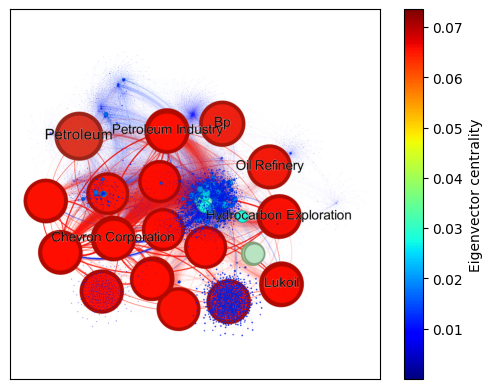

In [72]:
get_centrality_colorbar(nx.eigenvector_centrality(g), 'Eigenvector centrality', './assets/imgs/eigenvector-centrality.png')

C:\Users\rapha\AppData\Local\Temp\ipykernel_8024\618288388.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label=title)


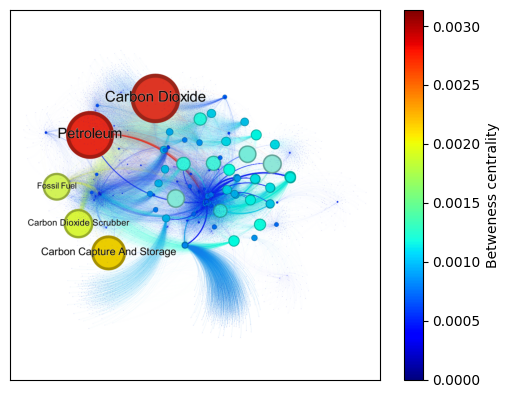

In [84]:
get_centrality_colorbar(nx.betweenness_centrality(g), 'Betweness centrality', './assets/imgs/betweness-centrality.png')

## PDF and CDF plot

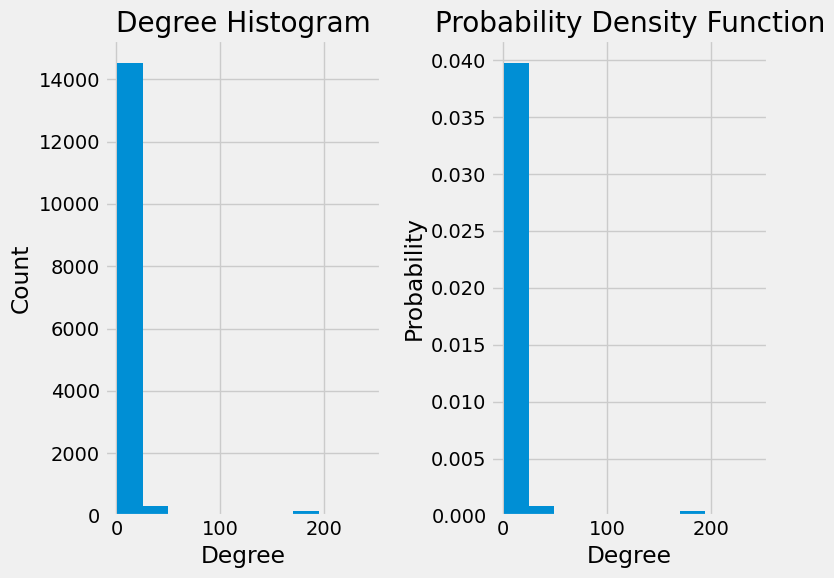

In [6]:
# Número de bins para o histograma
BINS = 10

# Configuração do tema de cores para o gráfico
plt.style.use("fivethirtyeight")
# Alternativamente, você pode usar o estilo padrão com a linha abaixo (comente/descomente conforme necessário).
# plt.style.use("default")

# Ordena a sequência de graus em ordem decrescente
degree_sequence = sorted(indegree, reverse=True)

# Cria uma figura com dois subplots (1 linha, 2 colunas) para exibir o histograma e a função de densidade de probabilidade
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Plotagem do Histograma
all_data = ax[0].hist(degree_sequence, bins=BINS)
ax[1].hist(degree_sequence, bins=BINS, density=True)

# Configurações de Título e Rótulos para o Histograma
ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

# Configurações de Título e Rótulos para a Função de Densidade de Probabilidade
ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

# Ajusta o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [7]:
# All_data has information about degree_sequence and the width of each bin
print(all_data)

(array([1.452e+04, 3.120e+02, 1.800e+01, 6.000e+00, 2.000e+00, 0.000e+00,
       6.400e+01, 1.630e+02, 4.000e+00, 1.000e+00]), array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
       218.8, 243. ]), <BarContainer object of 10 artists>)


In [8]:
# Print the width of each bin
print(all_data[1])

[  1.   25.2  49.4  73.6  97.8 122.  146.2 170.4 194.6 218.8 243. ]


In [9]:
# Calc the width of each bin using numpy
# np.diff calc the difference between two positions in the array
bin_width = np.diff(all_data[1])
bin_width

array([24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2, 24.2])

In [10]:
# Total number of elements in array
all_data[0].sum()

15090.0

In [11]:
# Probability density function for each bin
# Please check the right figure above and compare the results
all_data[0]/(all_data[0].sum() * bin_width)

array([3.97614314e-02, 8.54377865e-04, 4.92910307e-05, 1.64303436e-05,
       5.47678119e-06, 0.00000000e+00, 1.75256998e-04, 4.46357667e-04,
       1.09535624e-05, 2.73839059e-06])

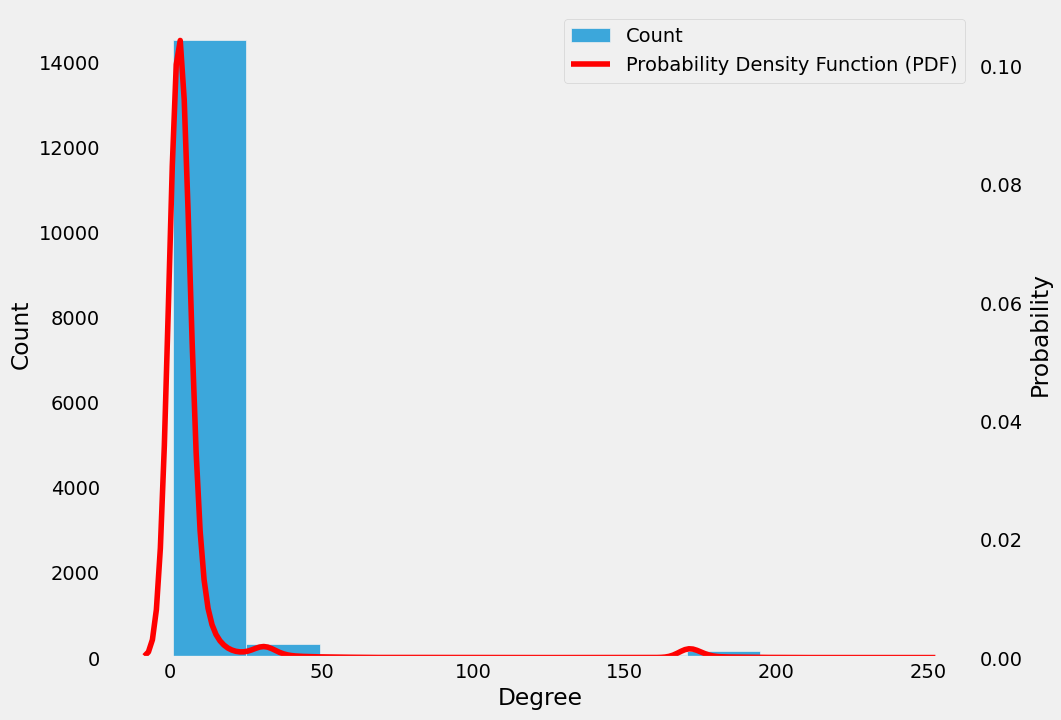

In [12]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=BINS,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# Ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('./assets/imgs/probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

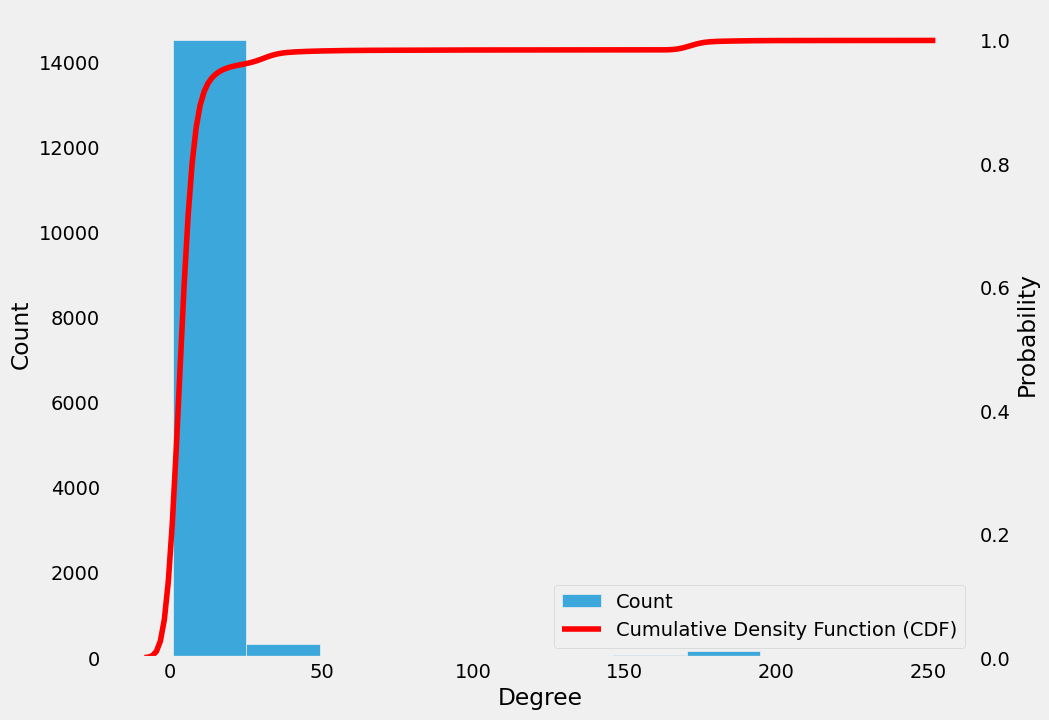

In [13]:
# Configuração do tema de cores para o gráfico
plt.style.use("fivethirtyeight")
# Alternativamente, você pode usar o estilo padrão com a linha abaixo (comente/descomente conforme necessário).
# plt.style.use("default")

# Cria uma figura com um subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plotagem do Histograma usando Seaborn
sns.histplot(degree_sequence, bins=BINS, label="Count", ax=ax)

# Cria um segundo eixo y (ax2) compartilhando o mesmo eixo x (ax)
ax2 = ax.twinx()

# Plotagem da Função de Densidade de Probabilidade (PDF) usando Seaborn
sns.kdeplot(degree_sequence, color='r', label="Probability Density Function (PDF)", ax=ax2)

# Combina as legendas dos dois subplots em um único lugar
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Desativa as grades nos dois subplots
ax.grid(False)
ax2.grid(False)

# Configurações de rótulos e eixos
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

# Salva o gráfico como uma imagem PNG
plt.savefig('./assets/imgs/probability_density_function.png', transparent=True, dpi=600, bbox_inches="tight")

# Exibe o gráfico
plt.show()


## K-code and K-shell

### Find K-core

In [23]:
cores = set([v for k,v in nx.core_number(g).items()])
cores

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 43,
 45,
 46,
 47,
 48,
 50,
 53,
 63,
 80,
 96,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 311}

In [20]:
# K-core nodes
core = 311
k_core_nodes = nx.k_core(g,core)
k_core_nodes.nodes

NodeView(('China National Petroleum Corporation', 'Petroleum Engineering', 'Tight Oil', 'Measurement-While-Drilling', 'Drill Stem Test', 'China Oilfield Services', 'Drilling Engineering', 'Suncor Energy', 'Pdvsa', 'Sonatrach', 'Niger Delta', 'Gasoline And Diesel Usage And Pricing', 'International Energy Agency', 'Compañía Española De Petróleos', 'Nationalization Of Oil Supplies', 'Qatarenergy', 'Brent Crude', 'Seismic Source', 'Predicting The Timing Of Peak Oil', 'History Of The Petroleum Industry In France', '1973 Oil Crisis', 'Rosneft', 'Well Intervention', 'Upstream (Petroleum Industry)', 'Petrovietnam', 'Conocophillips', 'Persian Gulf', '1980S Oil Glut', 'Saudi Aramco', 'North Sea Oil', 'Artificial Lift', 'Unconventional Oil', 'Indonesian Crude Price', 'Peak Oil', 'Production Sharing Agreement', 'Petroleum', 'Nov Inc.', 'Western Canadian Sedimentary Basin', 'Gas Reinjection', 'Opec Reference Basket', 'Japan Crude Cocktail', 'Galp Energia', 'Geosteering', 'Petroleum Licensing', 'Pet

### Finding K-shell

In [24]:
shell = 177
k_shell_nodes = nx.k_shell(g,shell)
k_shell_nodes.nodes

NodeView(('Hydraulic Fracturing',))

### Labelling nodes on K-shell and K-core

In [75]:
# Evaluete layer attribute for each node
attrs = {}
for node in g.nodes:
    attr = {}
    if node in k_shell_nodes:
        attr['layer'] = 0
    if node in k_core_nodes:
        attr['layer'] = 1
    attrs[node] = attr

# Add attribute
nx.set_node_attributes(g, attrs)

# Export graphml
nx.write_graphml(g, "./assets/Merged_Networks.graphml")

NameError: name 'k_shell_nodes' is not defined

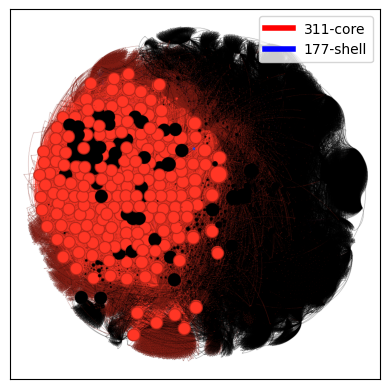

In [83]:
# Plot image
img = np.asarray(Image.open('./assets/imgs/kcore-kshell.png'))

# Build custom legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [
    Line2D([0], [0], color='r', lw=4, label='311-core'),
    Line2D([0], [0], color='b', lw=4, label='177-shell')
]

# Hide ticks
plt.xticks([])
plt.yticks([])

plt.legend(handles=legend_elements, loc='upper right')

# Plot image and colorbar
plt.imshow(img)